# 作業：全新的神經網路練習

我們活在幸運的時代，機器學習被包裝成黑盒子，就算你完全不知到神經網路，也可以將 X, y 丟進神經網路去優化

下方有兩個 cell 依序為：


1. Attention 神經網路 layer
2. 含有 Attention 的 model


請將 u22-lstm.ipynb 當中的範例，全部複製過來，然後將當中的 LSTM 模型改成下方的神經網路模型，並且訓練、回測看看！


可以先將model 當作黑盒子，先不用理解 Attention Layer 是在做什麼也沒關係喔！

### 覺得想要深入研究再看 - Attention layer 的相關介紹：
* [論文網址：Attention is all you need](https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)
* [比較簡單的文章介紹（中文）](https://www.itread01.com/content/1550070201.html)
* [比較簡單的文章介紹（英文）](http://mlexplained.com/2017/12/29/attention-is-all-you-need-explained/)
* [更簡單的文章介紹（中文）](https://medium.com/@cyeninesky3/attention-is-all-you-need-%E5%9F%BA%E6%96%BC%E6%B3%A8%E6%84%8F%E5%8A%9B%E6%A9%9F%E5%88%B6%E7%9A%84%E6%A9%9F%E5%99%A8%E7%BF%BB%E8%AD%AF%E6%A8%A1%E5%9E%8B-dcc12d251449)
* [英文影音教學](https://www.youtube.com/watch?v=EgCPRvgltoE)

# 開始寫作業囉！

## u22 產生 feature 和 label 的程式碼(請自行填寫)

In [17]:
# u22-lstm.ipynb 當中的程式碼 （preprocessing）

In [4]:
from finlab.data import Data
data = Data()
twii = data.get("發行量加權股價指數")

In [5]:
twii.resample('15T')

stock_id,台股指數
date,
2006-01-02 09:00:00,6548.34
2006-01-02 09:01:00,6457.61
2006-01-02 09:02:00,6452.82
2006-01-02 09:03:00,6452.39
2006-01-02 09:04:00,6451.61
2006-01-02 09:05:00,6454.88
2006-01-02 09:06:00,6459.31
2006-01-02 09:07:00,6471.44
2006-01-02 09:08:00,6476.53


In [10]:
twii = twii['台股指數'].resample('15T').first().dropna()
twii.head()

In [11]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

In [12]:
print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

before dropping NaN (64657, 43)
after dropping NaN (62729, 43)


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc si

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,KDb4,KDb5,KDb6,KDb7,KDb8,a5,a10,a20,a40,a80,a160,a320,a640,a720,a840,a960,a1024,b1,b2,b3,b4,b5,b6,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,6.272900e+04,62729.000000
mean,-1.218389e-16,2.160959e-15,-4.548559e-15,-3.036584e-15,-4.520012e-15,-4.387189e-15,-1.451536e-16,3.220459e-17,-3.672484e-20,-3.264971e-17,1.106458e-17,6.633480e-18,3.376562e-17,3.474967e-17,-3.805579e-17,2.913475e-14,1.513118e-14,-1.319051e-14,1.804262e-15,-7.264329e-15,5.399466e-16,-1.656026e-15,-1.702142e-15,7.247060e-16,1.901790e-15,-1.382082e-15,-1.317556e-15,6.339173e-15,-1.598765e-15,-2.932220e-16,-9.862532e-16,-6.343244e-15,1.975965e-15,-1.714023e-15,4.460078e-18,2.855866e-17,-1.774474e-16,-6.676333e-16,-2.247021e-16,2.949633e-16,-8.376450e-17,-1.852941e-16,1.000112
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008195
min,-4.477728e+00,-4.482773e+00,-4.478107e+00,-4.445262e+00,-4.417988e+00,-4.366670e+00,-6.647186e+00,-2.579923e+00,-2.654112e+00,-2.610137e+00,-2.615968e+00,-2.621129e+00,-2.639579e+00,-2.533480e+00,-2.462802e+00,-1.498286e+01,-1.087678e+01,-9.720990e+00,-7.849269e+00,-6.250427e+00,-4.552390e+00,-3.623925e+00,-3.426807e+00,-3.446466e+00,-3.525284e+00,-3.592813e+00,-3.599363e+00,-7.792772e+00,-6.564203e+00,-5.936996e+00,-5.490338e+00,-6.208457e+00,-5.844419e+00,-5.569863e+00,-7.154576e+00,-6.179429e+00,-2.148805e+00,-1.968482e+00,-1.738850e+00,-1.665388e+00,-1.803547e+00,-1.931638e+00,0.924507
25%,-7.030892e-01,-6.994969e-01,-6.825172e-01,-6.745808e-01,-6.716929e-01,-6.596236e-01,-5.176571e-01,-6.390271e-01,-6.533980e-01,-6.329433e-01,-6.360096e-01,-6.121039e-01,-5.975719e-01,-5.855142e-01,-5.407913e-01,-3.298502e-01,-3.855724e-01,-4.664773e-01,-5.256450e-01,-5.523249e-01,-5.908103e-01,-5.916572e-01,-5.580615e-01,-5.537993e-01,-5.472321e-01,-5.386103e-01,-5.341691e-01,-4.630370e-01,-4.887516e-01,-4.909908e-01,-5.016879e-01,-4.967093e-01,-5.018630e-01,-5.252418e-01,-5.075105e-01,-5.224209e-01,-7.424454e-01,-6.938221e-01,-7.301683e-01,-6.783701e-01,-6.723096e-01,-6.884810e-01,0.997012
50%,8.827961e-02,1.186630e-01,1.218650e-01,1.381547e-01,1.440794e-01,1.541543e-01,1.057331e-01,-1.220898e-02,-3.034953e-02,-1.728346e-03,-3.635540e-03,4.032401e-03,1.180458e-02,3.993537e-02,4.561114e-02,-9.310528e-03,-1.616706e-02,-4.581647e-02,-7.437704e-02,-1.007582e-01,-1.200853e-01,-1.512777e-01,-1.859666e-01,-1.808904e-01,-1.765685e-01,-1.734288e-01,-1.759072e-01,6.695742e-02,7.334166e-02,1.030031e-01,1.042276e-01,9.693880e-02,1.056443e-01,1.180286e-01,8.454126e-02,9.305531e-02,-1.460067e-01,-2.300002e-01,-2.470427e-01,-2.138636e-01,-1.795300e-01,-1.979784e-01,1.000237
75%,7.389081e-01,7.270271e-01,7.083379e-01,7.152120e-01,7.193117e-01,7.177751e-01,6.350719e-01,6.514056e-01,6.723612e-01,6.098875e-01,6.214750e-01,6.608890e-01,6.644101e-01,6.356320e-01,6.209023e-01,3.104228e-01,3.361121e-01,3.820457e-01,4.159850e-01,4.527445e-01,4.574440e-0

In [14]:
import tqdm

n = 3

X = []
y = []
indexes = []
dataset_scaled_x = dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
    X.append(dataset_scaled_x.iloc[i:i+n].values)
    y.append(dataset_scaled['return'].iloc[i+n-1])
    indexes.append(dataset_scaled.index[i+n-1])

In [15]:
import numpy as np
X = np.array(X)
y = np.array(y)
indexes = np.array(indexes)

## 神經網路 Model （完全不用改）

In [16]:
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras import backend as K


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

import keras

input_shape = X[0].shape # 還沒有 X ，請自己試試看！（參考u22-lstm.ipynb）
SEQ_LEN = input_shape[0]

model = keras.models.Sequential()

model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
#model.add(keras.layers.Dropout(0.8))
#model.add(keras.layers.BatchNormalization())
model.add(Attention(SEQ_LEN))
model.add(keras.layers.Dense(32, activation="relu"))
#model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(1))
model.compile(optimizer=keras.optimizers.Adam(0.0005), loss='binary_crossentropy' , metrics = ['accuracy'])



Using TensorFlow backend.
C:\Users\Dandy\Anaconda3\envs\finlab\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Instructions for updating:
Colocations handled automatically by placer.


## 神經網路訓練（完全不用改）

In [17]:
import datetime
X_train = X[indexes < datetime.datetime(2016, 1, 1)]
y_train = y[indexes < datetime.datetime(2016, 1, 1)]


get_best_model = keras.callbacks.ModelCheckpoint("lstm.mdl", monitor="val_acc")

history = model.fit(
    X_train,  
    y_train > 1, 
    batch_size=2000, 
    epochs=50,
    validation_split=0.2, 
    callbacks=[get_best_model])

Instructions for updating:
Use tf.cast instead.
Train on 36175 samples, validate on 9044 samples
Epoch 1/50
36175/36175 [==============================] - 4s 102us/step - loss: 2.4679 - acc: 0.4820 - val_loss: 1.0288 - val_acc: 0.5038
Epoch 2/50
36175/36175 [==============================] - 3s 76us/step - loss: 0.8708 - acc: 0.4886 - val_loss: 0.8302 - val_acc: 0.5042
Epoch 3/50
36175/36175 [==============================] - 3s 72us/step - loss: 0.7938 - acc: 0.4900 - val_loss: 0.7936 - val_acc: 0.5065
Epoch 4/50
36175/36175 [==============================] - 2s 66us/step - loss: 0.7662 - acc: 0.4936 - val_loss: 0.7696 - val_acc: 0.5048
Epoch 5/50
36175/36175 [==============================] - 2s 64us/step - loss: 0.7471 - acc: 0.4964 - val_loss: 0.7516 - val_acc: 0.5044
Epoch 6/50
36175/36175 [==============================] - 2s 67us/step - loss: 0.7339 - acc: 0.4999 - val_loss: 0.7391 - val_acc: 0.5073
Epoch 7/50
36175/36175 [==============================] - 3s 73us/step - loss: 0

## u22-lstm.ipynb 的程式碼（驗證、回測）

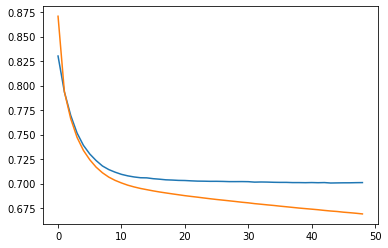

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

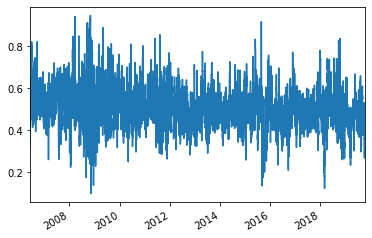

In [22]:
ey = model.predict(X)
ey = pd.Series(ey.swapaxes(0,1)[0], index=indexes)
ey.plot()

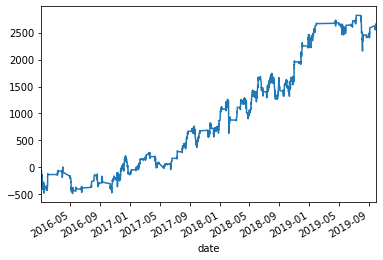

In [23]:

eq = twii[indexes]
returns = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.6)).rolling(10).sum() > 0
signal = signal.shift(1).fillna(False)

eq = (returns[signal]['2016':]).cumsum()
eq.plot()

In [21]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

735.0

In [33]:
signal.astype(int).diff().abs().fillna(0)

2006-06-06 09:15:00    0.0
2006-06-06 09:30:00    0.0
2006-06-06 09:45:00    0.0
2006-06-06 10:00:00    0.0
2006-06-06 10:15:00    0.0
2006-06-06 10:30:00    0.0
2006-06-06 10:45:00    0.0
2006-06-06 11:00:00    0.0
2006-06-06 11:15:00    0.0
2006-06-06 11:30:00    0.0
2006-06-06 11:45:00    0.0
2006-06-06 12:00:00    0.0
2006-06-06 12:15:00    0.0
2006-06-06 12:30:00    0.0
2006-06-06 12:45:00    0.0
2006-06-06 13:00:00    0.0
2006-06-06 13:15:00    0.0
2006-06-06 13:30:00    0.0
2006-06-07 09:00:00    0.0
2006-06-07 09:15:00    0.0
2006-06-07 09:30:00    0.0
2006-06-07 09:45:00    0.0
2006-06-07 10:00:00    0.0
2006-06-07 10:15:00    0.0
2006-06-07 10:30:00    0.0
2006-06-07 10:45:00    0.0
2006-06-07 11:00:00    0.0
2006-06-07 11:15:00    0.0
2006-06-07 11:30:00    0.0
2006-06-07 11:45:00    0.0
                      ... 
2019-10-07 13:00:00    0.0
2019-10-07 13:15:00    0.0
2019-10-07 13:30:00    0.0
2019-10-08 09:00:00    0.0
2019-10-08 09:15:00    0.0
2019-10-08 09:30:00    0.0
2

In [ ]:
# u22-lstm 程式碼(evaluation and backtest)